# Monte Carlo pricing
The Monte Carlo method is a powerful technique that can be used to price a very broad range of derivatives. In fact its more powerful than Finite Difference method. This method works because of **Feynman-Kac theorem**. This is a powerful theorem that shows you can solve a large family of partial differential equations by computing expectations in a particular probability model.

### Two probability models
$\mathbb {P} = \text{Probability model that represents our beliefs about the world eg.stock prices.}$
$\mathbb {Q} = \text{Abstract Probability model used for Pricing by MC method.}$

## The Feynman-Kac Theorem
This is the Fundamental theorem relating solving PDE's to computing Expectations.

**Theorem 1:** (Feynman-Kac Theorem)
    
Suppose that $X_t$ satisfies the SDE
$$
d X_t = \mu(X_t,t) dt + \sigma(X_t,t) dW_t.
$$
and that $v(x,t):=E_t(e^{-c(T-t)} f(X_T) \mid X_t=x)<\infty$,  for some constant $c$, then
$v$ solves the PDE
$$
\frac{\partial v}{\partial t} + \mu(x,t) \frac{\partial v}{\partial x}
+ \frac{1}{2} \sigma^2(x,t) \frac{\partial^2 v}{\partial x^2} - c V = 0
$$
with final condition $v(x,T)=f(x)$.

We can solve partial differential equations by computing expectations, or we can compute expectations by solving partial differential equations depending upon which we find easier.

If $X_t$ satisfies an SDE
$$
d X_s = \mu(X_s,s) ds + \sigma(X_s,s) dW_s
$$
with initial condition $X_t=x$ we can write $u(x,t):=E_t(f(X_T))$
as this expectation will only depend upon $x$ and $t$.
So long as we always have $E_t(|f(X_T)|)<\infty$, our last example of a martingale shows that $u(X_t,t)$ must be a martingale. Just take $Y_T=f(X_T)$.
Let's assume $u$ is smooth enough to apply Ito's Lemma. We get 
$$
d u(X_t,t) = \frac{\partial u}{\partial t} \, dt
+ \frac{\partial u}{\partial x} \mu(X_t,t) \, dt
+ \frac{1}{2} \frac{\partial^2 u}{\partial x^2} \sigma^2(X_t,t) \, dt
+ \frac{\partial u}{\partial x} \sigma(X_t,t) \, dW_t.
$$
We know $u(X_t,t)$ is a martingale, so there can't be any drift term.

Therefore
$$
\frac{\partial u}{\partial t} + \mu(x,t) \frac{\partial u}{\partial x}
+ \frac{1}{2} \sigma^2(x,t) \frac{\partial^2 u}{\partial x^2} = 0
$$
e have $v(x,t)=e^{-c(T-t)}u(x,t).$ We know $u(x,t)=f(x)$ so $v(x,t)=e^0 u(x,t)=f(x)$.
We compute
$$\frac{\partial v}{\partial t}=ce^{-c(T-t)} u(x,t) + e^{-c(T-t)} \frac{\partial u}{\partial t} $$
$$\frac{\partial v}{\partial x}=e^{-c(T-t)}\frac{\partial u}{\partial x}$$
$$\frac{\partial^2 v}{\partial x^2}=e^{-c(T-t)}\frac{\partial^2 u}{\partial x^2}$$
So
$$
\begin{split}
\frac{\partial v}{\partial t} &+ \mu(x,t) \frac{\partial v}{\partial x} + \frac{1}{2} \sigma^2(x,t)  \frac{\partial^2 v}{\partial x^2}
- c v(x,t) \\
&= \exp(-c(T-t)) \left( \frac{\partial u}{\partial t} + \mu(x,t) \frac{\partial u}{\partial x} +
\frac{1}{2} \sigma^2(x,t) \frac{\partial^2 u}{\partial x^2} \right)
\end{split}
$$
According to the first version of the Feynman-Kac theorem the right hand side vanishes, so the left hand side does too.

## Risk-Neutral Pricing
Recall:
**Theorem 2:** (Replication)
Suppose that the stock price process $S_t$ satisfies

$$
d S_t = S_t(\mu \, dt + \sigma \, dW^{\mathbb P}_t)
$$

then the price $V(S,t)$ of a derivative with payoff function $f(S_T)$ may be computed by solving the
*Black-Scholes PDE*
$$
\frac{\partial V}{\partial t}
+ \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}
+ r S \frac{\partial V}{\partial S}
- r V = 0
$$
with final condition $V(S_T,T)=f(S_T)$.

We can combine Black Scholes Theory of Replication with Feynman-Kac Theorem to obtain the theory of Risk-Neutral pricing.The key is to apply Feynman-Kac Theorem to Black-Scholes PDE.

**Theorem 3:** Suppose that the stock price process $S_t$ satisfies
$$
d S_t = S_t(\mu \, dt + \sigma \, dW^{\mathbb P}_t).\qquad \longrightarrow (S_t\text{ uses $\mathbb P$ measure)}
$$
The price $V(S,t)$ of a derivative with payoff function $f(S_T)$ may be computed by simulating
$$
d \tilde{S}_t = \tilde{S}_t(r \, dt + \sigma \, dW^{\mathbb Q}_t) \qquad \longrightarrow (\tilde{S}_t\text{ uses $\mathbb Q$ measure)}
$$
with initial condition $\tilde{S}_t=S$,
in which case we will have

$$V(S,t):=E^{\mathbb Q}_t(e^{-r(T-t)} f(\tilde{S}_T) \mid \tilde{S}_t=S).$$

In particular $V(S_0,0)=E^{\mathbb Q}_t(e^{-rT} f(\tilde{S}_T) )$. 

### The Pricing Measure

You should think of the process
$$
d \tilde{S}_t = \tilde{S}_t(r \, dt + \sigma \, dW^{\mathbb Q}_t)
$$
as an entirely abstract process which you can use to compute the *price* of a derivative.

The ${\mathbb Q}$-measure is often called the *Pricing Measure/Risk-Neutral Measure* to emphasize this point. It has no other purpose than for computing prices. In real world, we expect $\mu>r$, however in a `Risk-Neutral world`, we would have $\mu=r$.

### Deriving Solution of Black-Scholes PDE using Feynman-Kac
From the theory of Risk-Neutral Pricing, We can write the price as an Expectation. The price of call option at time $0$ in the Black-Scholes model is given by the Expectation of discounted payoff:
$$
V = E^{\mathbb Q}\bigl(e^{-rT} \max\{\tilde{S}_T-K,0\}\bigl)
$$
where $\tilde{S}_T$ is the solution of the SDE
$$
d \tilde{S}_t = \tilde{S}_t(r \, dt + \sigma \, dW^{\mathbb Q}_t)
$$
for a Wiener process $W^{\mathbb Q}_t$. The solution for this SDE is
$$
\tilde{S}_t = S_0 \exp((r - \frac{1}{2}\sigma^2) t + \sigma W^{\mathbb Q}_t ).
$$
Since, $\tilde{S}_T$ follows Log-Normal Distribution, we can compute option price $V$ as an Integral because Expectation is an Integral. For the density function(PDF), we will use the Log-Normal distribution.
$$
V = \int_{-\infty}^{\infty} e^{-rT} \max\{\tilde{S}_T - K, 0 \} * {(\text{pdf of } \tilde{S}_T)} \, dz 
$$
This Integral with Log-Normal pdf for $\tilde{S}_T$ is slightly complicated to solve. Instead, we solve an easier Integral. A trick that makes the computations a bit simpler is to work with $\tilde{Z}_T:=\log(\tilde{S}_t)$
as this will be normally distributed. So the price of a call option is given by
$$
V = E(e^{-rT} \max\{e^{\tilde{Z}_T}-K,0\} )
$$
where $\tilde{Z}_T$ is normally distributed with mean $A:=\log(S_0) + (r-\frac{1}{2}\sigma^2)T$ and standard deviation
$B:=\sigma \sqrt{T}$.
It follows that $V$ is given by the following integral
$$
\begin{split}
V &= \int_{-\infty}^{\infty} e^{-rT} \max\{e^z - K, 0 \} \overbrace{ \frac{1}{B \sqrt{2 \pi}} e^{-\frac{(z-A)^2}{2 B^2 }}}^{\text{PDF of $\tilde{Z}$}} \, dz \qquad \text{($\tilde{z}$ in terms of dummy variable $z$)}\\
&= \int_{\log K}^{\infty} e^{-rT} (e^z-K) \frac{1}{B \sqrt{2 \pi}} e^{-\frac{(z-A)^2}{2 B^2 }} \, dz \\
\end{split}
$$
The last step uses the fact that $e^z-K\geq 0$ if and only if $z\geq \log(K)$. Lets evaluate this Integral and see if we get the same formula as discovered by Black and Scholes:

The price of a call option at time $0$ in the Black-Scholes model is given by
$$
V = S N(d_1) - e^{-rT} K N(d_2)
$$
where
$$
d_1 := \frac{1}{\sigma \sqrt{T} } ( \log(S/K) + (r+\tfrac{1}{2}\sigma^2){T} )
$$
$$
d_2 := \frac{1}{\sigma \sqrt{T} } ( \log(S/K) + (r-\tfrac{1}{2}\sigma^2){T} ) := d_1 - \sigma \sqrt{T} .
$$


In [23]:
# import numpy as np
# from scipy.integrate import quad

# def integrand(z, A, B, K, r, T):
#     return np.exp(-r*T) * (np.exp(z) - K) * (1 / (B * np.sqrt(2 * np.pi))) * np.exp(-(z - A)**2 / (2 * B**2))

# # Constants.
# S0 = 100
# sigma = 0.2
# r = 0.05
# K = 115
# T = 1
# A = np.log(S0) + (r-sigma**2*0.5)*T  # Mean of Zt.
# B = sigma * np.sqrt(T)  # Standard Deviation of Zt.

# # Integration bounds.
# lower_limit = np.log(K)
# upper_limit = np.inf

# # Evaluate the integral.
# result, error = quad(integrand, lower_limit, upper_limit, args=(A, B, K, r, T));

# print("The value of the integral is:", result)
# print("Error in the estimation:", error)

In [2]:
# It is important to tell sympy that all our terms are real and which are positive, otherwise the
# integral becomes impossible for it to do.

import sympy as sp

r, z = sp.symbols('r z', real=True)
K, T, S, sigma = sp.symbols('K T S sigma', real=True, positive=True)
B = sigma * sp.sqrt(T)
A = sp.log(S) + (r-sigma**2/2)*T
integrand = sp.exp(-r*T)*(sp.exp(z)-K)*(1/(B*sp.sqrt(2*sp.pi)))*sp.exp(-(z-A)**2/(2*B**2))
integrand

sqrt(2)*(-K + exp(z))*exp(-T*r)*exp(-(-T*(r - sigma**2/2) + z - log(S))**2/(2*T*sigma**2))/(2*sqrt(pi)*sqrt(T)*sigma)

In [3]:
V = sp.integrate( integrand, (z,sp.log(K),sp.oo) ).simplify()
V

(-K*erf(sqrt(2)*(2*T*r - T*sigma**2 + log(S**2/K**2))/(4*sqrt(T)*sigma)) - K + S*exp(T*r)*erf(sqrt(2)*(2*T*r + T*sigma**2 + log(S**2/K**2))/(4*sqrt(T)*sigma)) + S*exp(T*r))*exp(-T*r)/2

`Gaussian Integrals` are usually expressed in terms of *error function*. But in the formula given by Black-Scholes, the cdf of the Standard Normal distribution $N(x)$ is instead used so we will also write the error function in terms of $N(x)$ using the following relationship:
$$
\boxed{\text{erf}(x)=2 N(\sqrt{2}x)-1}
$$
In Sympy, to do the replacement of x in the expression for $erf(x)$, we use the wild expression *w*.

In [4]:
N = sp.Function('N')
w = sp.Wild('w')
V = V.replace(sp.erf(w),2*N(sp.sqrt(2)*w)-1)
V = V.simplify()
V

(-K*N((2*T*r - T*sigma**2 + log(S**2/K**2))/(2*sqrt(T)*sigma)) + S*N((2*T*r + T*sigma**2 + log(S**2/K**2))/(2*sqrt(T)*sigma))*exp(T*r))*exp(-T*r)

In [5]:
d1,d2 = sp.symbols('d1 d2', real=True, positive=True)
d1 = 1/(sigma*sp.sqrt(T)) * (sp.log(S/K) + (r+(1/2)*sigma**2)*T)
d2 = 1/(sigma*sp.sqrt(T)) * (sp.log(S/K) + (r-(1/2)*sigma**2)*T)

# Checking expressions inside N(*) is d1 and d2.
exp_d1 = 1/(2*sigma*sp.sqrt(T)) * (2*T*r + T*sigma**2 + (sp.log(S**2/K**2)))
exp_d2 = 1/(2*sigma*sp.sqrt(T)) * (2*T*r - T*sigma**2 + (sp.log(S**2/K**2)))
print(sp.simplify(d1 - exp_d1) == 0, sp.simplify(d2 - exp_d2) == 0)

True True


As we can see, we have derived the solution of Black-Scholes PDE using Feynman-Kac as an Integral(Expectation).
Lets also derive an analytic formula for price of a `Digital Call Option`. A Digital call option with strike $K$ and maturity $T$  whose payoff is given by:
$$
\text{payoff}=
\begin{cases}
1 & S_T > K \\
0 & \text{otherwise}.
\end{cases}
$$ 


In [6]:
# Similar to above but we change the function $f$ in the integrand. 
integrand = sp.exp(-r*T)*(1/(B*sp.sqrt(2*sp.pi)))*sp.exp(-(z-A)**2/(2*B**2))
V = sp.integrate( integrand, (z,sp.log(K),sp.oo) ).simplify()
N = sp.Function('N')
w = sp.Wild('w')
V = V.replace(sp.erf(w),2*N(sp.sqrt(2)*w)-1)
V = V.simplify()
V

N((2*T*r - T*sigma**2 + log(S**2/K**2))/(2*sqrt(T)*sigma))*exp(-T*r)

So the price of digital call option is $\mathbf{e^{-rT} N(d2)}.$

## Monte Carlo Algorithm for Pricing

Monte Carlo method is especially used for pricing `Path-dependant Derivatives.` *Path-dependent* derivatives have a payoff which depends upon the whole stock price path $S_t \in [0,T]$. Some of the examples are `Asian options, up-and-out knock-out option, up-and-in knock-in option, down-and-out knock-out option and one-touch option etc.`

**Theorem:** A **path-dependent derivative** in the Black-Scholes model
may be replicated given an initial payment of

$$
E^{\mathbb Q}_t(e^{-r(T-t)} \text{payoff} )
$$
so long as this expectation exists.  In this formula, the payoff must be computed the history of $\tilde{S}_t$
rather than $S_t$. This formula gives the price of the derivative.

The proof of this theorem uses a suitable variation of the delta-hedging strategy to perform the replication and then applies the Feynman-Kac theorem. Martingale Representation Theorem enable us to prove that the replicating strategy exists without actually computing precisely what this replicating strategy is.

### Martingale Representation Theorem
Let $(M_t)_{t\geq 0}$ be a martingale with respect to a filtration $(\mathcal{F}_t)_{t\geq 0}$. The Martingale Representation Theorem states that if $X_t$ is an integrable process that is adapted to the filtration $(\mathcal{F}_t)_{t\geq 0}$, then there exists a predictable process $H_t$ such that 
$$X_t = X_0 +  \int_{0}^{t} H_s \,dM_s $$
Here, $X_0$ is the initial value of the process $X_t$, $H_t$ is the predictable process, and the integral $\int_{0}^{t} H_s \,dM_s$ is a stochastic integral with respect to the martingale $M_t$. 

The theorem essentially states that any integrable process adapted to a filtration can be represented as the sum of its past information (captured by the predictable process) and the random fluctuations that cannot be predicted (captured by the martingale). This theorem provides a framework for constructing trading strategies and pricing formulas based on martingale methods.

Here's how the **Martingale Representation Theorem** can be used to prove the **existence of replicating strategies:**

- **Framework for Pricing Derivatives**: In mathematical finance, a derivative security's price is often modeled as the expected value of its future payoffs, discounted to the present. The market is typically assumed to be arbitrage-free, meaning that it's not possible to make a riskless profit. Under these assumptions, the derivative's price must be such that no arbitrage opportunities exist.

- **Martingale Pricing Theory**: In the framework of martingale pricing theory, the fundamental idea is that the discounted price process of a derivative should be a martingale under the risk-neutral probability measure. This means that the expected future value of the derivative, discounted to the present, is equal to its current value. If this condition holds, there are no arbitrage opportunities.

- **Construction of the Replicating Portfolio**: The Martingale Representation Theorem allows us to express the derivative's payoff as the sum of a predictable process and a martingale. This essentially means that the derivative's future payoffs can be decomposed into two components: one that can be predicted based on available information (predictable process) and one that represents random fluctuations (martingale).

- **Use in Pricing and Replication**: Suppose we have a derivative security with a known payoff structure. We can use the Martingale Representation Theorem to express its payoff as the sum of a predictable process and a martingale. Then, by constructing a portfolio that replicates the predictable part of the derivative's payoff and is hedged against the martingale part, we can replicate the derivative's payoff. This replicating portfolio allows us to construct a strategy that mimics the derivative's performance without introducing any arbitrage.

- **Verification of No Arbitrage**: Once we have constructed the replicating portfolio, we can verify that it satisfies the no-arbitrage condition by ensuring that its initial cost equals the derivative's current price and that it eliminates any possibility of riskless profit.

In summary, the Martingale Representation Theorem provides a theoretical underpinning for the existence of replicating strategies for derivative securities within a no-arbitrage framework, allowing practitioners to price derivatives and construct hedging strategies effectively.


### Monte Carlo Pricing Algorithm

To estimate the price of the derivatives by Monte Carlo we do the following:

1. Performing a simulation in the ${\mathbb Q}$-measure.
2. Computing the resulting payoff using $\tilde{S}_t$ instead of $S_t$.
3. Take the average and discount it by $e^{-rT}$(i.e. Taking $\mathbb E$ and Discounting).

Lets price an Asian Call option in Black-Scholes Model using Monte Carlo with following parameters:
$$S_0 = 100, r = 0.05, \sigma = 0.25, T = 1$$
An *Asian* call option with maturity $T$ and strike $K$ has payoff given by $\max\{ \overline{S} - K, 0\}$ where $\overline{S}$ is the average value of $S$. We must pass $r$ as drift $\mu$ since we are performing simulation in the ${\mathbb Q}$-measure using Monte Carlo.

In [7]:
import mathfinance as mf 
import scipy.stats

def monte_carlo_pricer( S0, r, sigma, T, n_steps, n_paths, payoff_function ):
    """Returns Price and Confidence Interval."""
    S_twiddle, times = mf.simulate_gbm_paths(S0, r, sigma, T, n_steps, n_paths )
    payoffs = payoff_function(S_twiddle)  # Payoff Vector.
    p = 99
    alpha = scipy.stats.norm.ppf((1-p/100)/2)
    price = np.exp(-r*T)*np.mean( payoffs )  # Expectation of discounted payoff.
    sigma_sample = np.exp(-r*T) * np.std( payoffs )
    lower = price + alpha*sigma_sample/np.sqrt(n_paths)
    upper = price - alpha*sigma_sample/np.sqrt(n_paths)
    return  price, lower, upper

def asian_call_payoff( S, K ):
    """Returns Payoff Vector."""
    S_bar = np.mean(S,axis=1)  # S_bar is average over time points i.e. rows so axis = 1.
    return np.maximum( S_bar-K, 0 )

def price_asian_call_monte_carlo( S0, r, sigma, K, T, n_steps, n_paths ):
    def payoff_fn(S):
        return asian_call_payoff(S,K)
    return monte_carlo_pricer(S0, r, sigma, T, n_steps, n_paths, payoff_fn )

K = 105; T = 1;
S0 = 100; r = 0.05; sigma = 0.25
n_steps = 365; n_paths = 100000;

price,low,high = price_asian_call_monte_carlo(S0,r,sigma,K, T, T*365, n_paths)
print(f"The price of the Asian call option is estimated as £{price:.2f}.")

The price of the Asian call option is estimated as £4.62.


## Estimate Accuracy of Monte Carlo Algorithm.
Using the Central Limit Theorem, We can measure the error in our price estimation.

Let $\mu_\text{sample}$ denote the sample mean of
$$e^{-rT} \text{payoff} $$
and let $\sigma_\text{sample}$ denote the sample standard deviation. Let us assume that this is a reasonable estimate for the true standard deviation(i.e. Population Standard Deviation).
We can construct a confidence interval for the expectation using the Central Limit Theorem in the usual way.
So the $2$-sided $p$-% confidence interval will be:
$$
\boxed{\mu_{\text{sample}} \pm \frac{\sigma_\text{sample}}{\sqrt{n}} \underbrace{N^{-1}\left(\frac{1-\frac{p}{100}}{2}\right)}_{\alpha}} 
$$
where $n$ is the number of sample paths. $p\% = 95\%$ confidence interval means $[0.025,0.975]$.

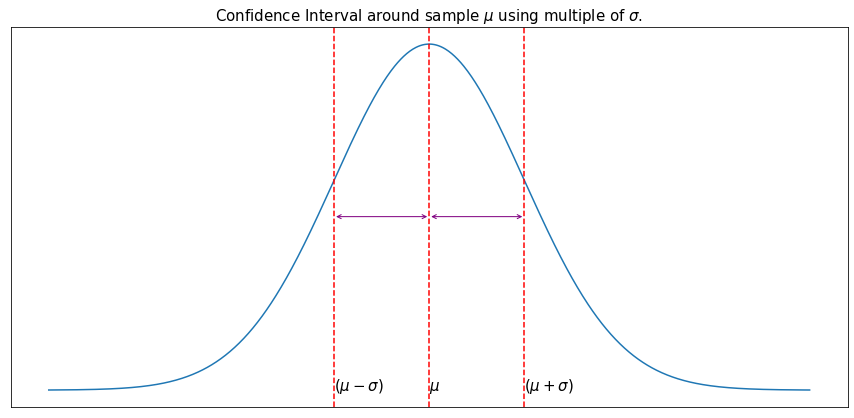

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]

mu = 5  # Sample Mean.
sigma = 1  # Sample Standard deviation.
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate the PDF (Probability Density Function) for normal distribution.
pdf = scipy.stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf)
plt.axvline(mu, color='r', linestyle='--', label='$\mu_{\text{sample}}$')
plt.axvline(mu + sigma, color='r', linestyle='--', label='μ + σ')
plt.axvline(mu - sigma, color='r', linestyle='--', label='μ - σ')
plt.annotate("", xy=(mu + sigma, 0.2), xytext=(mu, 0.2),arrowprops=dict(arrowstyle="<->", color='purple'))
plt.annotate("", xy=(mu - sigma, 0.2), xytext=(mu, 0.2),arrowprops=dict(arrowstyle="<->", color='purple'))
plt.text(mu, 0, '$\mu$', fontsize = 15)
plt.text(mu + sigma, 0, '$(\mu + \sigma)$', fontsize = 15)
plt.text(mu - sigma, 0, '$(\mu - \sigma)$', fontsize = 15)
plt.title('Confidence Interval around sample $\mu$ using multiple of $\sigma$.',fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
print(f'Confidence interval=[{low:.2f},{high:.2f}] for Asian Call Option.')

Confidence interval=[4.55,4.69] for Asian Call Option.


### Limitations of Monte Carlo Method
Monte Carlo method for pricing is easy to implement. It can be slow, but for general multidimensional models there isn't a faster alternative, even to price European call options. Another limitation of Monte Carlo pricing is that you cannot price **American options**. Because the payoff depends on the behaviour of the option holder as well as the stock price, these cannot be priced by the Monte Carlo algorithm we have given. You can use finite difference methods or Binomial model to price American options.

#### Pricing Digital Call Option
Lets write a function to price a digital Call Option with strike $K$ in the Black Scholes model by Monte Carlo method using $99\%$ confidence interval and check this price with the Analytical Formula. Recall, price of digital call option was derived above as $\mathbf{e^{-rT} N(d2)}.$

In [10]:
def digital_call_payoff(S, K):
    """Returns Payoff Vector of ones or zeros."""
    S_T = S[:,-1]  # Final value of Stock price at time T.
    payoff = S_T>K
    return payoff

def price_digital_call_monte_carlo(S0, r, sigma, K, T, n_steps, n_paths):
    def payoff_fn(S):
        return digital_call_payoff(S,K)
    return monte_carlo_pricer(S0, r, sigma, T, n_steps, n_paths, payoff_fn) 

def digital_call_price_black_scholes(S, r, sigma, K, T, t=0):
    """Analytical Price of Digital Call using Black Scholes formula."""
    d1,d2 = mf.compute_d1_and_d2( S, t, K, T, r, sigma)
    price = np.exp(-r*T) * scipy.stats.norm.cdf(d2)
    return price

S0 = 100
r = 0.05
sigma = 0.2
K = 105
T = 2
n_steps = 1
n_paths = 1000000

price,low,high = price_digital_call_monte_carlo(S0,r,sigma,K, T, n_steps, n_paths)
assert low<high
print(f"The price of the Digital call option is estimated as £{price:.4f}.")
print(f'Confidence interval=[{low:.4f},{high:.4f}] for Digital Call Option.')

true_price = digital_call_price_black_scholes(S0,r,sigma,K,T)
assert low<true_price
assert true_price<high
print(f"The price of the Digital call option using analytical formula is £{true_price:.4f}.")

error = np.abs(true_price - price)
assert error<0.001
print(f"The difference in price calculated by Monte Carlo compared to true price is {error}.")

The price of the Digital call option is estimated as £0.4660.
Confidence interval=[0.4649,0.4672] for Digital Call Option.
The price of the Digital call option using analytical formula is £0.4667.
The difference in price calculated by Monte Carlo compared to true price is 0.0006768575210279737.


Note that we have set *n_steps = 1*. This has lead to faster computation of the call price. However, increasing the number of steps in the Monte Carlo simulation, you do not increase the accuracy of the computation of the option price. This is because we can simulate $S_T$ perfectly using only one time step as we have perfectly solved the SDE.

## Writing Test functions for Monte Carlo Pricer
Any code that isn't well tested is normally wrong. When you don't have analytical formula to compare your option price with for eg. Asian Option, we cannot be sure if our Monte Carlo price is correct.

`Idea: The strategy is to write more general code that can price any derivative and test it with derivatives
where we know the analytical price like vanilla Calls and Puts. We'll then be confident that our more general code works.`

We have already written a general `monte_carlo_pricer` function which takes *payoff function* as one of its parameters. This function takes the matrix *S_twiddle* whose rows correspond to paths/scenarios and whose columns correspond to time points and compute the payoff in each scenario. To ensure our function `monte_carlo_pricer` is well-tested and can be used to price a broad range of exotic derivatives in the Black-Scholes model, we test it with simple case of Vanilla Call and Vanilla Put Options.

### Testing Monte Carlo Pricer with a Vanilla Call and Vanilla Put Option
The parameters for the test are $\mathbf{K = 120}$; $\mathbf{T = 1}$; $\mathbf{S_0 = 100}$; $\mathbf{r = 0.04}$; $\mathbf{\sigma = 0.20}$;
**number of steps = 365; number of paths = 100000**.

In [11]:
# Values used in tests: S0, r, sigma, T, K, n_steps, n_paths.
S0 = 100
r = 0.04
sigma = 0.20
T = 1
K = 120
n_steps = 365
n_paths = 100000

# Testing with Vanilla Call.
def price_call_monte_carlo(S0, r, sigma, K, T, n_steps, n_paths):
    # Defining the payoff function for European Call. 
    def payoff_fn( S ):
        """ Takes an array of stock price as input and outputs payoff. """
        S_T = S[:,-1]
        payoff = np.maximum(S_T-K, 0)
        return payoff
    return monte_carlo_pricer(S0, r, sigma, T, n_steps, n_paths, payoff_fn)

def test_price_call_monte_carlo():
    np.random.seed(0)
    # Only one step is needed to price a Call option, hence n_steps = 1.
    price,low,high = price_call_monte_carlo(S0, r,sigma,K, T,1, n_paths)  # Price and Confidence Interval.
    true_price = mf.blackscholes(r, S0, K, T, sigma, t=0, type="call")  # Actual price using Black Scholes Analytical formula.
    error = np.abs(true_price - price)
    # Checking whether Analytical BS price lies within Confidence Interval. 
    assert low<true_price
    assert true_price<high
    assert error<0.1
        
# Testing with Vanilla Put.
def price_put_monte_carlo( S0, r, sigma, K, T, n_steps, n_paths ):
    # Defining the payoff function for European Put. 
    def payoff_fn( S ):
        """ Takes an array of stock price as input and outputs payoff. """
        S_T = S[:,-1]
        payoff = np.maximum( K-S_T, 0 )
        return payoff
    return monte_carlo_pricer(S0, r, sigma, T, n_steps, n_paths, payoff_fn)

def test_price_put_monte_carlo():
    np.random.seed(0)
    # Only one step is needed to price a Put option, hence n_steps = 1.
    price,low,high = price_put_monte_carlo(S0, r,sigma,K, T,1, n_paths)  # Price and Confidence Interval.
    true_price = mf.blackscholes(r, S0, K, T, sigma, t=0, type="put")  # Actual price using Black Scholes Analytical formula.
    error = np.abs(true_price - price) 
    # Checking whether Analytical BS price lies within Confidence Interval. 
    assert low<true_price
    assert true_price<high
    assert error<0.1
          
test_price_call_monte_carlo()
test_price_put_monte_carlo()

We can now be **confident that our Monte Carlo Pricer is well tested** and the price of the Asian option is accurate to the $99\%$ confidence interval. Since, Asian options does not have an Analytical formula to compare it with, we will only write test function for its payoff function.

In [12]:
def test_asian_call_payoff():
    np.random.seed(0)
    S = np.array([[3,7,2],[1,2,3],[3,4,2],[1,1,1]])
    payoffs = asian_call_payoff(S,2)    # S_bar -K.
    expected = np.array([2,0,1,0])
    # Using function from numpy testing module. This function is particularly useful when dealing with floating-point numbers 
    # where exact equality checks might fail due to numerical imprecision.
    np.testing.assert_almost_equal( payoffs, expected, decimal=7)
    
test_asian_call_payoff() 

Lets also write test functions for digital call function.

In [13]:
def test_digital_call_price_black_scholes():
    np.random.seed(0)
    price = digital_call_price_black_scholes(S0,r,sigma,K,T)
    expected = np.exp(-r*T) * scipy.stats.norm.cdf(1/(sigma*np.sqrt(T))*(np.log(S0/K)+(r-0.5*sigma**2)*T))
    np.testing.assert_almost_equal( price, expected, decimal=7)
    
def test_price_digital_call_monte_carlo():
    np.random.seed(0)
    # Only one step is needed to price a Digital Call, hence n_steps = 1.
    price,low,high = price_digital_call_monte_carlo(S0, r,sigma,K, T,1, n_paths)  # Price and Confidence Interval.
    true_price = digital_call_price_black_scholes(S0,r,sigma,K,T)  # Actual price using Black Scholes Analytical formula.
    error = np.abs(true_price - price) 
    # Checking whether Analytical BS price lies within Confidence Interval. 
    assert low<true_price
    assert true_price<high
    assert error<0.1
    
test_digital_call_price_black_scholes()
test_price_digital_call_monte_carlo() 

### Pricing Knock-out Call Option
Lets write a function to price a **Up-and-out Knock-out Call Option**. This is an option in the Black Scholes model with maturity $T$, strike $K$ and barrier $B$ whose payoff is given by
$$
\text{payoff}=
\begin{cases}
\max\{S_T - K, 0\} & S_t < B \text{ for all } t \in [0,T]\\
0 & \text{otherwise}.
\end{cases}
$$

In [14]:
def up_and_out_knockout_call_payoff(S, K, B):
    """Returns Payoff Vector."""
    S_T = S[:,-1]  # Final value of Stock price at time T. 
    highest_price = np.max(S,axis=1)
    payoff = np.where(highest_price >= B, 0, np.maximum(S_T - K, 0))
    return payoff

def price_up_and_out_knockout_call_monte_carlo(S0, r, sigma, K, B, T, n_steps, n_paths):
    def payoff_fn(S):
        return up_and_out_knockout_call_payoff(S,K,B)
    return monte_carlo_pricer(S0, r, sigma, T, n_steps, n_paths, payoff_fn) 

def test_up_and_out_knockout_call_payoff():
    np.random.seed(0)
    S = np.array([[95, 100, 105, 108, 110, 107, 109],[102, 105, 95, 100, 108, 107, 108]])
    payoffs = up_and_out_knockout_call_payoff(S,K=102,B=109)   
    expected = np.array([0,6])
    np.testing.assert_almost_equal( payoffs, expected, decimal=7)

# Implementation.
test_up_and_out_knockout_call_payoff()  

K = 105; T = 1; B = 111
S0 = 100; r = 0.05; sigma = 0.25
n_steps = 365; n_paths = 100000;
price,low,high = price_up_and_out_knockout_call_monte_carlo(S0,r,sigma,K, B, T, n_steps, n_paths)
print(f"The price of a Up-and-out Knock-out Call Option is estimated as £{price:.4f}.")
print(f'Confidence interval = [{low:.4f},{high:.4f}] for Up-and-out Knock-out Call Option.')

The price of a Up-and-out Knock-out Call Option is estimated as £0.0209.
Confidence interval = [0.0189,0.0230] for Up-and-out Knock-out Call Option.


A **Down-and-out Knock-out Call Option** with maturity $T$, strike $K$ and barrier $B$ has payoff given by
$$
\text{payoff}=
\begin{cases}
\max\{S_T - K, 0\} & S_t > B \text{ for all } t \in [0,T]\\
0 & \text{otherwise}.
\end{cases}
$$

In [15]:
def down_and_out_knockout_call_payoff(S, K, B):
    """Returns Payoff Vector."""
    S_T = S[:,-1]  # Final value of Stock price at time T. 
    lowest_price = np.min(S,axis=1)
    payoff = np.where(lowest_price <= B, 0, np.maximum(S_T - K, 0))
    return payoff

def price_down_and_out_knockout_call_monte_carlo(S0, r, sigma, K, B, T, n_steps, n_paths):
    def payoff_fn(S):
        return down_and_out_knockout_call_payoff(S,K,B)
    return monte_carlo_pricer(S0, r, sigma, T, n_steps, n_paths, payoff_fn) 

def test_down_and_out_knockout_call_payoff():
    np.random.seed(0)
    S = np.array([[95, 100, 105, 108, 110, 107, 109],[102, 105, 101, 100, 108, 107, 108]])
    payoffs = down_and_out_knockout_call_payoff(S,K=105,B=94)   
    expected = np.array([4,3])
    np.testing.assert_almost_equal( payoffs, expected, decimal=7)
    
# Implementation.
test_down_and_out_knockout_call_payoff()  

K = 107; T = 1; B = 98
S0 = 100; r = 0.05; sigma = 0.25
n_steps = 365; n_paths = 100000;
price,low,high = price_down_and_out_knockout_call_monte_carlo(S0,r,sigma,K, B, T, n_steps, n_paths)
print(f"The price of a Down-and-out Knock-out Call Option is estimated as £{price:.4f}.")
print(f'Confidence interval = [{low:.4f},{high:.4f}] for Down-and-out Knock-out Call Option.')

The price of a Down-and-out Knock-out Call Option is estimated as £2.6722.
Confidence interval = [2.5840,2.7604] for Down-and-out Knock-out Call Option.


### Pricing Knock-in Call Option
Lets write a function to price a **Up-and-in Knock-in Call Option**. This is an option in the Black Scholes model with maturity $T$, strike $K$ and barrier $B$ whose payoff is given by
$$
\text{payoff}=
\begin{cases}
0 & S_t < B \text{ for all }t \in [0,T] \\
\max\{S_T - K, 0\}  & \text{otherwise}.
\end{cases}
$$

In [16]:
def up_and_in_knockin_call_payoff(S, K, B):
    """Returns Payoff Vector."""
    S_T = S[:,-1]  # Final value of Stock price at time T. 
    highest_price = np.max(S,axis=1)
    payoff = np.where(highest_price < B, 0, np.maximum(S_T - K, 0))
    return payoff

def price_up_and_in_knockin_call_monte_carlo(S0, r, sigma, K, B, T, n_steps, n_paths):
    def payoff_fn(S):
        return up_and_in_knockin_call_payoff(S,K,B)
    return monte_carlo_pricer(S0, r, sigma, T, n_steps, n_paths, payoff_fn) 

def test_up_and_in_knockin_call_payoff():
    np.random.seed(0)
    S = np.array([[95, 100, 105, 108, 110, 107, 109],[102, 105, 95, 100, 108, 107, 108]])
    payoffs = up_and_in_knockin_call_payoff(S,K=102,B=109)   
    expected = np.array([7,0])
    np.testing.assert_almost_equal( payoffs, expected, decimal=7)

# Implementation.
test_up_and_in_knockin_call_payoff() 

K = 105; T = 1; B = 111
S0 = 100; r = 0.05; sigma = 0.25
n_steps = 365; n_paths = 100000;
price,low,high = price_up_and_in_knockin_call_monte_carlo(S0, r, sigma, K, B, T, n_steps, n_paths)
print(f"The price of an Up-and-in Knock-in Call Option is estimated as £{price:.4f}.")
print(f'Confidence interval = [{low:.4f},{high:.4f}] for Up-and-in Knock-in Call Option.')

The price of an Up-and-in Knock-in Call Option is estimated as £9.9801.
Confidence interval = [9.8415,10.1187] for Up-and-in Knock-in Call Option.


### Pricing One-touch Option
Lets write a function to price a **One-touch Option**. This is an option in the Black Scholes model with maturity $T$ and barrier $B$ whose payoff is given by
$$
\text{payoff}=
\begin{cases} 
1, & \text{if } S_t \geq B\text{ for all }t \in [0,T] \\
0, & \text{otherwise}
\end{cases}
$$

In [17]:
def one_touch_payoff(S, B):
    """Returns Payoff Vector of ones or zeros."""
    highest_price = np.max(S,axis=1)
    payoff = np.where(highest_price >= B, 1, 0)
    return payoff

def price_one_touch_monte_carlo(S0, r, sigma, B, T, n_steps, n_paths):
    def payoff_fn(S):
        return one_touch_payoff(S, B)
    return monte_carlo_pricer(S0, r, sigma, T, n_steps, n_paths, payoff_fn) 

def test_one_touch_payoff():
    np.random.seed(0)
    S = np.array([[95, 100, 105, 108, 110, 107, 109],[102, 105, 95, 100, 108, 107, 108]])
    payoffs = one_touch_payoff(S, B=110)
    expected = np.array([1,0])
    np.testing.assert_almost_equal( payoffs, expected, decimal=7)

# Implementation.
test_one_touch_payoff()

T = 1; B = 125
S0 = 100; r = 0.05; sigma = 0.25
n_steps = 365; n_paths = 100000;
price,low,high = price_one_touch_monte_carlo(S0, r, sigma, B, T, n_steps, n_paths)
print(f"The price of an One-touch Option is estimated as £{price:.4f}.")
print(f'Confidence interval = [{low:.4f},{high:.4f}] for One-touch Option.')

The price of an One-touch Option is estimated as £0.3631.
Confidence interval = [0.3593,0.3668] for One-touch Option.


## Computing Greeks using Monte Carlo
### Monte Carlo Greeks: Finite Difference
Greeks are sensitivity of price of derivative $V$ to changes in Parameters. It is very important to be able to calculate the Greeks for Risk management. A trader will need to know the delta of a derivative in order to carry out the replication strategy.

Lets denote $\theta$ for the each of the parameters of the model as general. So, with $V(\theta)$ continuous and at least twice differentiable, we have for any $\Delta\theta >0$ using Taylor expansion:
$$
V(\theta + \Delta\theta) = V(\theta) + \frac{\partial V}{\partial \theta}\Delta\theta + \frac {1}{2} \frac{\partial^2 V}{\partial \theta^2}\Delta\theta^2 + \cdots
$$

In the **Monte Carlo Framework**, the sensitivity to $\theta$ is estimated using **Forward Difference** as:

$$
\frac{\partial V}{\partial \theta} \approx \frac{\bar{V}(\theta + \Delta\theta) - \bar{V}(\theta)}{\Delta\theta}\\
\text{where } \bar{V} = \frac{1}{N} \sum_{i=1}^{N} V_i(\theta)
$$

We can also estimate the sensitivity to $\theta$ using **Central Difference** as:

$$
\frac{\partial V}{\partial \theta} = \frac{\bar{V}(\theta + \Delta\theta) - \bar{V}(\theta - \Delta\theta)}{2\Delta\theta} + \mathcal{O}(\Delta\theta^2)\qquad (\Phi)
$$

If we were to use **Monte Carlo Finite Difference using Central difference** approach to calculate Greeks then, we first calculate Expected value of discounted Payoff with parameter $\theta$ which is perturbed/shocked with $\Delta\theta$ i.e. $\bar{V}(\theta + \Delta\theta)$. We do the same with $\bar{V}(\theta - \Delta\theta)$. Then we use the above formula $(\Phi)$.

#### Delta using Monte Carlo Finite Difference
There is a benefit to using Central Difference over Forward difference for $\Delta\theta<<0$. Let $\Delta\theta = h$. To compute the Delta of an option by Monte Carlo we should choose a reasonably small value of $h$ (say $h=S_0 \times 10^{-5}$) and compute the price of the option when the first simulated stock price satisfies $\tilde{S}_0=S_0-h$ and also when $\tilde{S}_0=S_0+h$ but using the same scenarios for $W^{\mathbb Q}_t$ in both simulations. We can then estimate the Delta using the central difference estimate for the derivative. Lets write a function to compute the delta of a call option by Monte Carlo.

Note: For the central difference we will use the following trick.
Suppose that $X$ and $Y$ are two random variables and we wish to estimate the difference $E(X-Y)$. We will **not** estimate $E(X)$ by a simulation of $X$, then estimate $E(Y)$ using a simulation of $Y$, then compute the difference. The reason is that each estimate is just an estimate and so will contain some random error. The correct approach is to simulate $X-Y$ directly or equivalently simulate $X$ and $Y$ separately but using the same scenarios in each simulation. One can then compute $E(X-Y)$ by taking the difference of the averages of $X$ and $Y$.

In [18]:
def delta_monte_carlo( S0, r, sigma, T, n_steps, n_paths, payoff_function ):
    h = S0*10**(-5)
    S_twiddle, times = mf.simulate_gbm_paths(S0, r, sigma, T, n_steps, n_paths )
    paths_for_S_minus_h = S_twiddle/S0*(S0-h)
    paths_for_S_plus_h = S_twiddle/S0*(S0+h)
    payoffs_S_plus_h = np.exp(-r*T)*payoff_function(paths_for_S_plus_h)
    payoffs_S_minus_h = np.exp(-r*T)*payoff_function(paths_for_S_minus_h)
    samples = (payoffs_S_plus_h-payoffs_S_minus_h)/(2*h)
    p = 99
    alpha = scipy.stats.norm.ppf((1-p/100)/2)
    delta = np.mean( samples )  # Computes Delta.
    sigma_sample = np.std( samples )  # Standard deviation of Delta.
    lower = delta + alpha*sigma_sample/np.sqrt(n_paths)
    upper = delta - alpha*sigma_sample/np.sqrt(n_paths)
    return lower, upper

def delta_call_confidence_interval_monte_carlo( S0, r, sigma, K, T, n_paths ):
    def call_payoff( S ):
        S_T = S[:,-1]
        return np.maximum( S_T-K, 0 )
    return delta_monte_carlo(S0, r, sigma, T, 1, n_paths, call_payoff )

In [22]:
def delta_call_monte_carlo( S0, r, sigma, K, T, n_paths ):
    low, high = delta_call_confidence_interval_monte_carlo(S0, r, sigma, K, T, n_paths )
    return 0.5*(low+high)  # Taking Average of the Confidence Interval.

def test_delta_call_monte_carlo():
    np.random.seed(0)
    K = 105; T = 1;
    S0 = 100; r = 0.05; sigma = 0.25
    n_paths = 100000;
    low,high = delta_call_confidence_interval_monte_carlo(S0, r,sigma,K, T, n_paths)
    bs_delta = mf.black_scholes_call_delta(S0,0,K,T,r,sigma)
    assert low<bs_delta
    assert bs_delta<high
    
test_delta_call_monte_carlo()
# Some More Test.
K = 105; T = 1;
S0 = 100; r = 0.05; sigma = 0.25
n_paths = 100000;
d1 = delta_call_monte_carlo(S0,r,sigma,K,T,n_paths)  # Delta simulation 1.
d2 = delta_call_monte_carlo(S0,r,sigma,K,T,n_paths)  # Delta simulation 2.
assert d1>0.53
assert d1<0.57
assert abs(d1-d2)>0.0000001 # Deterministic answers aren't OK.
print(d1,d2)

0.5551967241458239 0.549367537175375


There are other **Monte Carlo Methods** for calculating **Greeks** available. These include:
- Pathwise Sensitivities Method.
- Likelihood Ratio Method.

## Improving Accuracy Of Monte Carlo Method by Variance Reduction Techniques
## 1. Antithetic Variates/Sampling Method

Suppose we have a Monte Carlo pricer based on drawing $n$ normally distributed random
numbers ${\epsilon_i}$ ($1\leq i \leq n$). It is often better to compute the price using a sample based on $\epsilon_i$
and $-\epsilon_i$ rather than to use a sequence of $2n$ independent random variables. Here's the pseudo-code for using the antithetic sampling method
to price a derivative with payoff $f(S_T)$ in the Black-Scholes model

**Algorithm:**

1. Generate n independent standard normally distributed random numbers $\epsilon_i$. To perform antithetic sampling let $\epsilon_{i+n}=-\epsilon_i$.
2. Compute the stock price in scenario $i$

$$ S^i_T=S_0 e^{(r-\frac{1}{2}\sigma^2)T + \sigma \sqrt{T} \epsilon_i }$$

3. Estimate the price as $e^{-rT} \frac{1}{2n} \sum_{i=1}^{2n} f(S^i_T)$

The standard approach without antithetic sampling would be to generate $2n$ independent random numbers $\epsilon_i$.

*Explanation:*

To see why this is a good idea, let $\epsilon$ be a standard normally distributed random variable. Define

$$ X_1 = f(S_0 e^{(r-\frac{1}{2}\sigma^2)T + \sigma \sqrt{T} \epsilon}). $$

If we estimate $E(X_1)$ by generating $2n$ samples then, using the central limit theorem, the standard error of our estimate will be

$$ \sqrt{ \frac{1}{2n} \text{Var}(X_1)}. $$

Now define instead

$$ X_2 = f(S_0 e^{(r-\frac{1}{2}\sigma^2)T - \sigma \sqrt{T} \epsilon} )$$

We can see that as $\epsilon$ and $-\epsilon$ have the same distribution $E(X_1)=E(X_2)$. So if we let $M=\frac{1}{2}(X_1+X_2)$ then $E(M)=E(X_1)$ too. If we use the antithetic sampling
algorithm then we are in effect generating $n$ samples of the variable $M$. We compute that

$$ \text{Var}(M)=\text{Var}\left(\frac{X_1 + X_2}{2}\right) = \frac{1}{4}(\text{Var}(X_1) + \text{Var}(X_2) +2 \text{Cov}(X_1,X_2)). $$

We know that $\text{Var}(X_1) = \text{Var}(X_2)$. If we assume that $\text{Cov}(X_1,X_2)$ is negative, as it will be for many derivatives,
we will have

$$\text{Var}(M) \leq \frac{1}{2}\text{Var}(X_1).$$

This means that if we estimate $E(\frac{1}{2}(X_1+X_2))$ using $n$ samples, by the central limit theorem the standard error of our estimate will be less than

$$ \sqrt{ \frac{1}{2n} \text{Var}(X_1) }. $$

Thus so long as the correlation between $X_1$ and $X_2$ is negative, antithetic sampling will reduce the standard error of the estimate for $E(X_1)=E(M)$.

Note that this only works
if the covariance is negative. If the correlation is positive then antithetic sampling
will increase the standard error of the estimate. However, you expect the price of a call option to increase if the stock price increases and decrease if the stock price decreases so
in the case of a call option you would expect the correlation between $X_1$ and $X_2$ to be negative.

## 2. The Control Variate Method

The control variate method is another way of improving Monte Carlo calculations.

Suppose we have a random variable $M$ with $E(M)=\mu$ and we wish to find $\mu$. Suppose there is another random variable $T$ with $E(T)=\tau$, but that we know $\tau$.
For example $M$ might be the random payoff of a knock-out call option and $T$ might be the payoff of an ordinary call-option. We can compute the discounted expected value of $T$
in the ${\mathbb Q}$-measure (i.e.\ the price) using the Black-Scholes formula. This means ${\tau}$ is something we can compute exactly.

Introduce a new random variable $M^*=M + c(T-\tau)$. We will choose the value of $c$ later, but whatever value we choose we will have $E(M^*)=E(M)$. The idea is to choose
$c$ to minimize the variance. We calculate

$$\text{Var}(M^*) = \text{Var}(M) + c^2 \text{Var}(T) + 2c \, \text{Cov}( M,T).$$

We therefore choose $c$ to equal

$$ c=\frac{-\text{Cov}(M,T)}{\text{Var}(T,T)} $$

giving that

$$ \text{Var}(M^*) = (1-\rho^2)\text{Var}(M). $$

This motivates the control variate sampling algorithm.

**Algorithm:**

1. Generate $n$ scenarios for the pair of values $(M^i,T^i)$, where $M^i$ is the value of $M$ in scenario $i$ and $T^i$ is the value of $T$ in that same scenario.
For example, you would generate $n$ stock price paths and compute the payoffs of the knock-out option and the call option.
2. Use the sample covariance and variance to choose a value of $c$ so that we have approximately

$$ c \approx \frac{-\text{Cov}(M,T)}{\text{Var}(T,T)} $$

3. The control variate esimate for $\mu$ is

$$ \mu = -c \tau + \frac{1}{n} \sum_i^n (M^i + c T^i) $$

The standard error of this estimate will be

$$ \sqrt{ \frac{1}{n} (1-\rho^2)\text{Var}(M) }. $$

In [24]:
import numpy as np
import mathfinance as mf
import matplotlib.pyplot as plt 

for B in [110,150,10000]:

    S0 = 100
    K = 100
    r = 0.02
    sigma = 0.2
    T = 1 

    n = 10000 # num scenarios for antithetic
    N=2*n # num scenarios for other methods
    m = 100 # time steps 

    dt = T/m  #...

    # Simulate the stock price
    epsilon = np.random.randn(N,m)

    Z = np.zeros((N,m+1))
    Z[:,0] = np.log(S0)
    Z_twiddle = np.zeros((n,m+1))
    Z_twiddle[:,0] = np.log(S0)

    for i in range(0,m):
        Z[:,i+1] = Z[:,i] + (r - 0.5*sigma**2)*dt + np.sqrt(dt)*sigma*epsilon[:,i]
        Z_twiddle[:,i+1] = Z_twiddle[:,i] + (r - 0.5*sigma**2)*dt - np.sqrt(dt)*sigma*epsilon[:n,i]

    S = np.exp(Z)
    S_twiddle = np.exp(Z_twiddle) #...

    # Compute the payoff

    def compute_discounted_payoff( S ):
        ST = S[:,-1]
        not_knocked_out = np.amax( S, axis=1 )<=B
        call_payoff = np.maximum( ST - K , 0)
        P = np.exp(-r*T)*not_knocked_out*call_payoff
        return P

    P = compute_discounted_payoff(S)
    P_twiddle = compute_discounted_payoff(S_twiddle) #...

    #  Compute the price using the different approaches

    # Standard monte carlo

    price_standard = np.mean(P)
    error_standard = np.std(P)/np.sqrt( len(P) )

    # Antithetic sampling

    avg = 0.5*(P[0:n]+P_twiddle[0:n])
    price_antithetic = np.mean( avg )
    error_antithetic = np.std(avg)/np.sqrt( len(avg ) ) #...

    # Control variate method

    gamma = mf.blackscholes(r, S0, K, T, sigma, t=0, type="call")
    ST = S[:,-1]
    C = np.exp(-r*T)*np.maximum( ST - K , 0)
    alpha_star = -np.cov(P,C)[0,1]/(np.std(C)**2)
    P_star = P + alpha_star*C
    price_control_variate = np.mean( P_star ) - alpha_star*gamma
    error_control_variate = np.std(P_star)/np.sqrt( len(P_star )) #...

    print( "B={}".format(B))
    print( "Simple Monte Carlo:\nPrice={}, Standard Error = {}".format(price_standard, error_standard) )
    print( "Antithetic:\nPrice={}, Standard Error = {}".format(price_antithetic, error_antithetic) )
    print( "Control Variate: Price={},\nStandard Error = {}".format(price_control_variate, error_control_variate) )
    print( "Black Scholes Price: {}".format(gamma))

    print( "" )

B=110
Simple Monte Carlo:
Price=0.19432944316814496, Standard Error = 0.00717686415142554
Antithetic:
Price=0.18824594213166893, Standard Error = 0.0069207012315645935
Control Variate: Price=0.1943125282587297,
Standard Error = 0.0071685220250829445
Black Scholes Price: 8.916037278572539

B=150
Simple Monte Carlo:
Price=6.92822164502698, Standard Error = 0.07482555286984519
Antithetic:
Price=6.962707286110119, Standard Error = 0.05677753708944299
Control Variate: Price=6.922462390465835,
Standard Error = 0.05556957672130035
Black Scholes Price: 8.916037278572539

B=10000
Simple Monte Carlo:
Price=9.052017159494937, Standard Error = 0.09788035444332484
Antithetic:
Price=9.097625149251144, Standard Error = 0.07592849550832978
Control Variate: Price=8.916030479238525,
Standard Error = 4.894262435558303e-06
Black Scholes Price: 8.916037278572539

